# [CoE202] **[Homework2]**  Polynomial fitting



### Introduction 
Given data points (x, y), we want to find non-linear estimator that fits well to the given data points where x is a two dimensional vector and y is scalar value.

This time, you have to guess the coefficients of the polynomial function that map x to y.

### 0. Importing packages

For this assignment we need Numpy, Matplotlib, and Scipy.

In [118]:
# Importing packages required for the homework
import numpy as np # this is for importing numpy library (and we will use abbreviation np for that)
import matplotlib.pyplot as plt # this is for importing matplotlib.pyplot (library for graph plot)
import scipy.io # this is for loading matlab file (data_homework2.mat)

### 1. Explore the data

Let's explore the format of the dataset before digging into programming. The following shows there are 1,000 data points in the dataset.

In [119]:
# load data file from Google drive
# from google.colab import drive
# drive.mount("/content/drive")

In [120]:
# the path can vary 
# mat = scipy.io.loadmat('/content/drive/My Drive/01_LectureNotes/CoE202/Colab/data/data_homework2.mat')
mat = scipy.io.loadmat('./data_homework2.mat')

# training inputs
x = mat['x'].T
y = mat['y'].T

print('x shape: ', x.shape)
print('y shape:  ', y.shape)

x shape:  (1000, 2)
y shape:   (1000, 1)


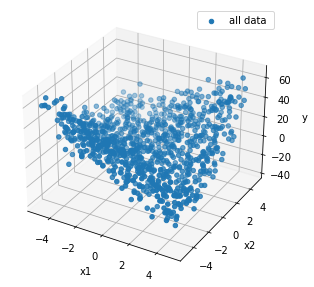

In [121]:
plt.figure(figsize=(8,5))
ax = plt.axes(projection = '3d')

ax.scatter(x[:, 0], x[:, 1], y, label = 'all data ')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.legend()
plt.show()

Here, we will use 80% of the data for training set,10% for validation, and other 10% for test set.

In [122]:
N, D = x.shape

# shuffle dataset
np.random.seed(202104)  # we give you the seed to grade your answer. Do not change.
new_idx = np.random.permutation(N)
x_shuffle = x[new_idx]
y_shuffle = y[new_idx]

p_train, p_val, p_test = 0.8, 0.1, 0.1

# split dataset 
x_train = x_shuffle[0:int(np.ceil(N*p_train)):,] # training data set
x_val = x_shuffle[int(np.ceil(N*p_train)):int(np.ceil(N*(p_train+p_val))):,] # validation data set
x_test = x_shuffle[int(np.ceil(N*(p_train+p_val))):N:,] # test data set

y_train = y_shuffle[0:int(np.ceil(N*p_train))] # training data set
y_val = y_shuffle[int(np.ceil(N*p_train)):int(np.ceil(N*(p_train+p_val)))] # validation data set
y_test = y_shuffle[int(np.ceil(N*(p_train+p_val))):N] # test data set

print('x_train shape: ', x_train.shape)
print('x_val shape: ', x_val.shape)
print('x_test shape: ', x_test.shape)

print('y_train shape:  ', y_train.shape)
print('y_val shape:  ', y_val.shape)
print('y_test shape:  ', y_test.shape)

x_train shape:  (800, 2)
x_val shape:  (100, 2)
x_test shape:  (100, 2)
y_train shape:   (800, 1)
y_val shape:   (100, 1)
y_test shape:   (100, 1)


### 2. Polynomial features
You need data matrices converted into the desired form (Phi & y)
that we can use the closed form solution to find the optimal parameters.

In [123]:
def poly_features(X):
    """Compute the feature matrix Phi

    Arguments:
      X: input data of size N x 2
    
    Returns:
      Phi: feature matrix of size N x ?
           [Hint] You have to guess polynomial terms that well mapped to data point y
    """
    N, D = X.shape
    X0 = X[:,0].reshape(-1, 1) 
    X1 = X[:,1].reshape(-1, 1)

    # [Problem 1] Returns feature matrix Phi from input variables.
    Phi = np.hstack([ X0 ** 2, X0, X1 ** 2, X1, np.ones((N, 1))])

    return Phi

def vectorize_y(y):
    y_vec = y.reshape(-1, 1)
    return y_vec

In [124]:
# feature matrix for training inputs
Phi_train = poly_features(x_train)
ytrain_vec = vectorize_y(y_train)

print('Phi_train shape:  ', Phi_train.shape)
print('ytrain_vec shape:  ', ytrain_vec.shape)

# feature matrix for validation inputs
Phi_val = poly_features(x_val)
yval_vec = vectorize_y(y_val)

print('Phi_val shape:  ', Phi_val.shape)
print('yval_vec shape:  ', yval_vec.shape)

# feature matrix for test inputs
Phi_test = poly_features(x_test)
ytest_vec = vectorize_y(y_test)

print('Phi_test shape:  ', Phi_test.shape)
print('ytest_vec shape:  ', ytest_vec.shape)

Phi_train shape:   (800, 5)
ytrain_vec shape:   (800, 1)
Phi_val shape:   (100, 5)
yval_vec shape:   (100, 1)
Phi_test shape:   (100, 5)
ytest_vec shape:   (100, 1)


### 3. Polynomial regression 
Once you have the data matrices converted into the desired form (Phi & y)
then we can use the closed form solution to find the optimal parameters.

In [125]:
def RMSE(y, ypred):
    """Calculate RMSE

    Arguments:
      y: ground truth of the data
      ypred: prediction of the data
    
    Returns:
      rmse: root mean square error between y and ypred
    """
    #[Problem 2] calculate RMSE
    rmse = np.sqrt(np.mean((y-ypred)**2)) 

    return rmse

def np_polynomial_regression(Phi, y):
    """Calculate coefficients

    Arguments:
      Phi: feature matrix
      y: target value
    
    Returns:
      theta: coefficients
    """
    N, D = Phi.shape
    #[Problem 3] calculate theta
    theta = (np.linalg.inv(Phi.T @ Phi) @ Phi.T) @ y

    return theta

In [126]:
theta = np_polynomial_regression(Phi_train, ytrain_vec)

print('Estimated theta is:  ',theta)

Estimated theta is:   [[ 0.13549934]
 [-0.62912749]
 [ 0.87595248]
 [ 0.04188223]
 [-0.81607076]]


### [Problem 4] 
Based on the estimated theta, write the polynomial function you have found.

e.g.) $ f(x) = 5x_{0}^2 + 3x_{1} + 3 $ 

**Your answer** ) $ f(x) = 0.13549934x_0^2 - 0.62912749x_0 + 0.87595248x_1^2 + 0.04188223x_1 - 0.81607076 $

In [127]:
# [Problem 5] Calculate the predicted y for all train, validation, and test data sets
ypred_train = poly_features(x_train) @ theta
ypred_val = poly_features(x_val) @ theta
ypred_test = poly_features(x_test) @ theta

In [128]:
# RMSE on validation set
rmse_train = RMSE(y_train, ypred_train)
rmse_val = RMSE(y_val, ypred_val)
rmse_test = RMSE(y_test, ypred_test)

print('RMS error on training set =  ',rmse_train)
print('RMS error on validation set =  :  ',rmse_val)
print('RMS error on test set =  :  ',rmse_test)

RMS error on training set =   14.969843236801164
RMS error on validation set =  :   14.39332804254274
RMS error on test set =  :   14.85715072540431


### [Problem 6]
The data was generated as $y=f(x)+\epsilon$ \\
where f(x) is a polymonial function and $\epsilon$ is a gaussian random noise with a mean value of 0 and a variation of $\sigma^2$.

What is your estimated of the variation $\sigma^2$,
assuming that you have found the correct parameters?

Use RMSE value of **test set** for your answer.

**Your answer** ) $\sigma^2 = 220.7349276774 $

### 4. Visualizing

Let's visualize the regression results (train & validation sets).

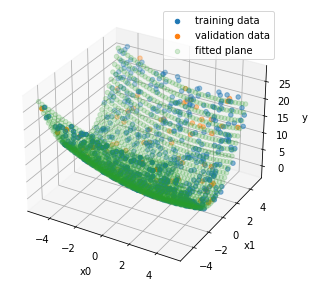

In [129]:
plt.figure(figsize=(8,5))

x_grid = np.mgrid[-5:5:0.25, -5:5:0.25].reshape(2,-1).T  
x1_grid = x_grid[:,0]
x2_grid = x_grid[:,1]
Phi_grid = poly_features(x_grid)
ypred_grid = Phi_grid @ theta

ax = plt.axes(projection = '3d')


ax.scatter(x_train[:, 0], x_train[:, 1], ypred_train, label = 'training data ') 
ax.scatter(x_val[:,0], x_val[:,1], ypred_val, label = 'validation data') 
ax.scatter(x_grid[:, 0], x_grid[:, 1], ypred_grid, label = 'fitted plane', alpha=0.2)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
ax.legend()
plt.show()

Let's visualize the regression results (test set only).

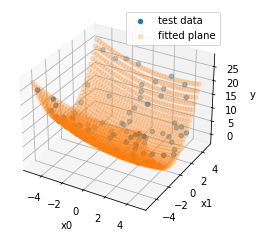

In [130]:
ax = plt.axes(projection = '3d')

ax.scatter(x_test[:, 0], x_test[:, 1], ypred_test, label = 'test data ')
ax.scatter(x_grid[:, 0], x_grid[:, 1], ypred_grid, label = 'fitted plane', alpha=0.2)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
ax.legend()
plt.show()